Praca domowa nr 3 Jakub Szulc

Jako temat mojej pracy wybrałem analizę tweetów zawierających hashtagi #israel oraz #palestine. Izrael i Palestyna to dwa narody, które od dziesięcioleci toczą długotrwały konflikt o terytorium na Bliskim Wschodzie. Konflikt ten ma korzenie historyczne, polityczne, religijne i społeczne, a jego głównym przedmiotem sporu jest ziemia, na której oba narody roszczą sobie prawa.

Dane pobrałem za pomocą paczki snscrape. Podzielone są na dwa pliki, z czego każdy zawiera około 30000 tweetów - po 100 dla każdego dnia od dzisiaj do 300 dni temu. Pobrałem tekst razem z datami (później okazało się, że te daty wcale nie były mi potrzebne). Wszystkie tweety są w języku angielskim.

In [ ]:
import snscrape.modules.twitter as sntwitter
from datetime import datetime, timedelta

hashtag = "israel"
hashtag2 = "palestine"

lang = "en"
tweetsPerDay = 100
maxTotalTweets = 30000


def downloadTweets(maxTotalTweets, tweetsPerDay, hashtag, lang):
    
    totalTweets = 0
    totalTweetsDay = 0
    tweets = []
    
    daysToProcess = generateDaysToProcess(maxTotalTweets, tweetsPerDay)

    for day in daysToProcess:
        if totalTweets >= maxTotalTweets:
                print("Max total tweets reached")
                print("Total tweets: " + str(totalTweets))
                break
                
        for tweet in sntwitter.TwitterHashtagScraper(hashtag + " lang:" + lang + " since:" + str(day) + " until:" + str(day + timedelta(days=1))).get_items():
                 
                tweets.append(str(tweet.date.date())+", "+str(tweet.rawContent).replace("\n", " ")+"\n")
                totalTweets += 1
                totalTweetsDay += 1
    
                if totalTweetsDay >= tweetsPerDay:
                    totalTweetsDay = 0
                    print("Total tweets: " + str(totalTweets))
                    break
    return tweets

def saveTweets(filename, tweets):
    with open (filename, "w", encoding="utf-8") as file:
        for tweet in tweets:
            file.write(tweet + "\n")

def generateDaysToProcess(maxTotalTweets, tweetsPerDay):
    daysToProcess = []
    for i in range(maxTotalTweets//tweetsPerDay):
        daysToProcess.append((datetime.now() - timedelta(days=i)).date())
    return daysToProcess

def main():
    saveTweets("tweetsIsrael.txt", downloadTweets(maxTotalTweets, tweetsPerDay, hashtag, lang))
    saveTweets("tweetsPalestine.txt", downloadTweets(maxTotalTweets, tweetsPerDay, hashtag2, lang))

if __name__ == '__main__':
    main()

W poniższym kodzie przeprowadziłem preprocessing danych tekstowych. Oto opis przeprowadzanych operacji:

Usunięcie daty z początku każdego tweeta.
Usunięcie znaku '#' z tweetów.
Usunięcie nazw użytkowników z tweetów (zaczynających się od '@').
Usunięcie linków URL z tweetów.
Zamiana wszystkich liter na małe.
Podział tweetów na słowa.
Usunięcie znaków specjalnych, takich jak '&', które występują w słowach.
Usunięcie znaków interpunkcyjnych z każdego słowa.
Usunięcie nawiasów i cudzysłowów.
Usunięcie wielokrotnych kropek na końcu słów.
Usunięcie pojedynczych kropek z każdego słowa.
Usunięcie nawiasów i kwadratowych nawiasów z początku każdego słowa.
Usunięcie nawiasów i kwadratowych nawiasów z końca każdego słowa.
Usunięcie pustych słów.
Usunięcie popularnych słów stopu (stop words) w języku angielskim.
Ponowne połączenie słów w przetworzonym tweecie.
Wyniki przetworzenia są zapisywane do plików "preprocessedIsrael.txt" i "preprocessedPalestine.txt".

W kolejnej części zadania w celu stworzenia chmur przeprowadziłem również tokenizację, wyodrębnienie unikalnych słów oraz połączenie unikalnych słów w jedną linię tekstu


In [ ]:
import re
from nltk.tokenize import word_tokenize
import nltk

def preprocessTweet(tweet):
    tweet = re.sub(r'^\d{4}-\d{2}-\d{2}, ', '', tweet)
    tweet = re.sub(r'#', '', tweet)
    tweet = re.sub(r'@\w+', '', tweet)
    tweet = re.sub(r'https?://\S+', '', tweet)
    tweet = tweet.lower()
    words = tweet.split()
    words = [re.sub(r'&amp;', '', word) for word in words]
    words = [re.sub(r'(?<=\w)[^\s\w](?![^\s\w])', '', word) for word in words]
    words = [re.sub(r'[|«»“”‘’,"–—…-]', '', word) for word in words]
    words = [re.sub(r'\([^)]*\)', '', word) for word in words]
    words = [re.sub(r'\.\.+$', '', word) for word in words]
    words = [re.sub(r'\.', '', word) for word in words]
    words = [re.sub(r'^[\(\[]', '', word) for word in words]
    words = [re.sub(r'[\)\]]$', '', word) for word in words]
    words = [word for word in words if word]
    preprocessedTweet = ' '.join(words)

    stop_words = list(nltk.corpus.stopwords.words('english'))
    words = word_tokenize(preprocessedTweet)
    words = [w for w in words if not w in stop_words]
    preprocessedTweet = ' '.join(words)


    return preprocessedTweet

def saveToFile(filename, tweets):
    with open (filename, "w", encoding="utf-8") as file:
        for tweet in tweets:
            file.write(tweet + "\n")

def getFile(filename):
    with open(filename, "r", encoding="utf-8") as file:
        tweets = file.readlines()
    return tweets

def preprocessFile(filename):
    tweets = getFile(filename)
    preprocessedTweets = [preprocessTweet(tweet) for tweet in tweets]
    return preprocessedTweets

def main():
    saveToFile("preprocessedIsrael.txt", preprocessFile("../download/tweetsIsrael.txt"))
    saveToFile("preprocessedPalestine.txt", preprocessFile("../download/tweetsPalestine.txt"))

if __name__ == '__main__':
    main()


Do analizy pobranych danych użyłem narzędzi NLTK Vader oraz Text2Emotion. Jako, że moja baza danych jest dosyć spora, to operacja ta zajęła mi kilka godzin. W celu przyspieszenia działania programu zapisywałem teksty tweetów razem z odpowiadającym im wynikom do plików tekstowych, a następnie wczytywałem je ponownie przy późniejszych operacjach. 

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from text2emotion import get_emotion

def analyzeSentiment(text):
    sid = SentimentIntensityAnalyzer()
    sentimentScores = sid.polarity_scores(text)

    return sentimentScores

def getFile(filename):
    with open(filename, "r", encoding="utf-8") as file:
        tweets = file.readlines()
    return tweets

def analyzeEmotions(text):
    emotions = get_emotion(text)
    return emotions

def analyzeFile(filename):
    tweets = getFile(filename)
    sentimentScores = []
    emotions = []
    text = []
    for tweet in tweets:
        if tweet == '\n':
            continue
        if tweet[-1]=='\n':
            tweet = tweet[:-1]
        sentimentScores.append(analyzeSentiment(tweet))
        emotions.append(analyzeEmotions(tweet))
        text.append(tweet)

    return sentimentScores, emotions, text

def main():
    sentimentScores1, emotions1, text1 = analyzeFile("../preprocessing/preprocessedIsrael.txt")
    with open("sentimentScoresIsrael.txt", "w", encoding="utf-8") as file:
        for i in range(len(text1)):
            file.write(str(text1[i])+", "+str(sentimentScores1[i])+", "+str(emotions1[i])+";"+'\n')


    sentimentScores2, emotions2, text2 = analyzeFile("../preprocessing/preprocessedPalestine.txt")
    with open("sentimentScoresPalestine.txt", "w", encoding="utf-8") as file:
        for i in range(len(text2)):
            file.write(str(text2[i])+", "+str(sentimentScores2[i])+", "+str(emotions2[i])+";"+'\n')

if __name__ == "__main__":
    main()

W celu kategoryzacji tweetów na pozytywne i negatywne pobrałem dane z plików i podzieliłem na 4 pliki - po 2 dla hashtagu. Za punkt podziału przyjąłem wartość 0.05 oraz -0.05 (compound score). Wyniki pomiędzy tymi wartościami uznałem za neutralne.

In [ ]:
import ast
def categorize(data):
    positiveTweets = []
    negativeTweets = []

    for tweet, sentiment_scores, emotions in data:
        compound_score = sentiment_scores['compound']
        if compound_score > 0.05:
            positiveTweets.append(tweet)
        elif compound_score < -0.05:
            negativeTweets.append(tweet)
    
    return positiveTweets, negativeTweets


def saveBothToFiles(positiveTweets, negativeTweets, filename1, filename2):
    with open(filename1, "w", encoding="utf-8") as file:
        file.writelines("\n".join(positiveTweets))

    with open(filename2, "w", encoding="utf-8") as file:
        file.writelines("\n".join(negativeTweets))

def parse_sentiment_scores(line):
    sentiment_start = line.index("{'neg':")
    sentiment_end = line.index("},") + 1
    emotions_start = line.index("{", sentiment_end)
    emotions_end = line.index("};", emotions_start) + 1

    sentiment_scores = ast.literal_eval(line[sentiment_start:sentiment_end])
    emotions = ast.literal_eval(line[emotions_start:emotions_end])

    return sentiment_scores, emotions


def parse_data(file):
    data = []
    for line in file:
        line = line.strip()
        if line:
            tweet_end = line.index(",")
            tweet = line[:tweet_end]
            scores, emotions = parse_sentiment_scores(line)

            data.append((tweet, scores, emotions))

    return data



def main():
    with open("sentimentScoresIsrael.txt", "r", encoding="utf-8") as file:
        dataIsrael = parse_data(file)

    with open("sentimentScoresPalestine.txt", "r", encoding="utf-8") as file:
        dataPalestine = parse_data(file)

    positiveTweetsIsrael, negativeTweetsIsrael = categorize(dataIsrael)
    saveBothToFiles(positiveTweetsIsrael, negativeTweetsIsrael, "positiveTweetsIsrael.txt", "negativeTweetsIsrael.txt")

    positiveTweetsPalestine, negativeTweetsPalestine = categorize(dataPalestine)
    saveBothToFiles(positiveTweetsPalestine, negativeTweetsPalestine, "positiveTweetsPalestine.txt", "negativeTweetsPalestine.txt")


if __name__ == '__main__':
    main()

Dzięki takiemu podziałowi mogłem przeprowadzić generowanie word cloud dla pozytywnych i negatywnych tweetów jak i dla ogółu tweetów dla Izraela i Palestyny.

Preprocessed Israel


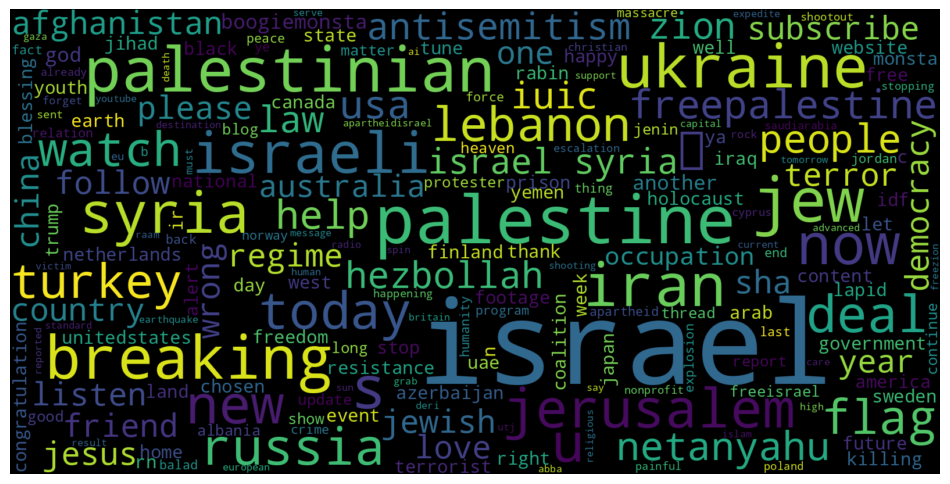

Preprocessed Palestine


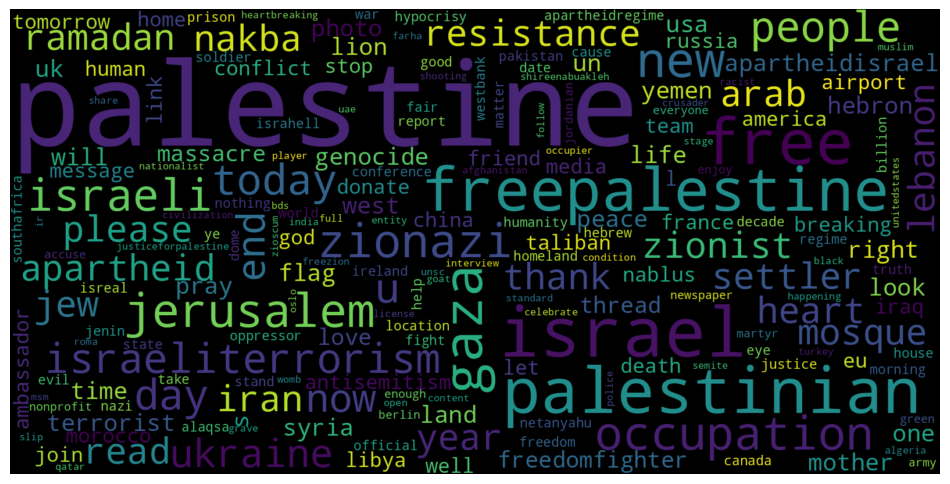

Positive Tweets Israel


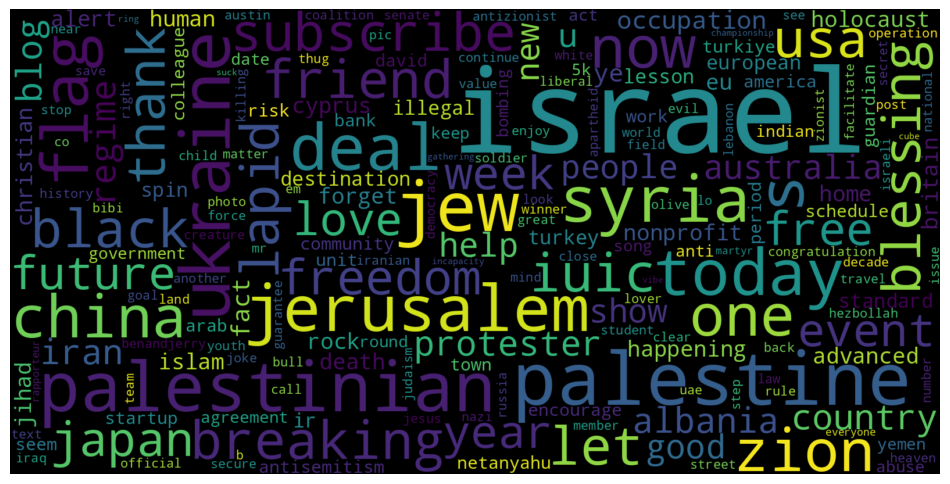

Negative Tweets Israel


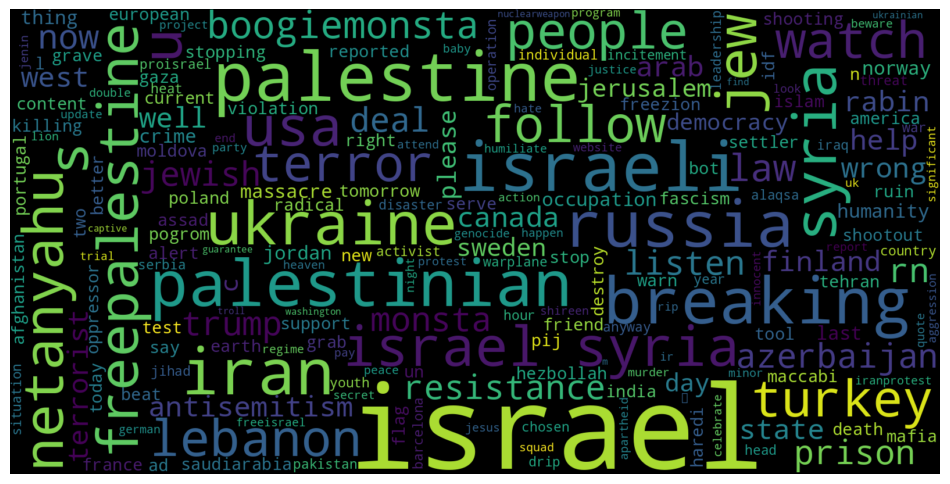

Positive Tweets Palestine


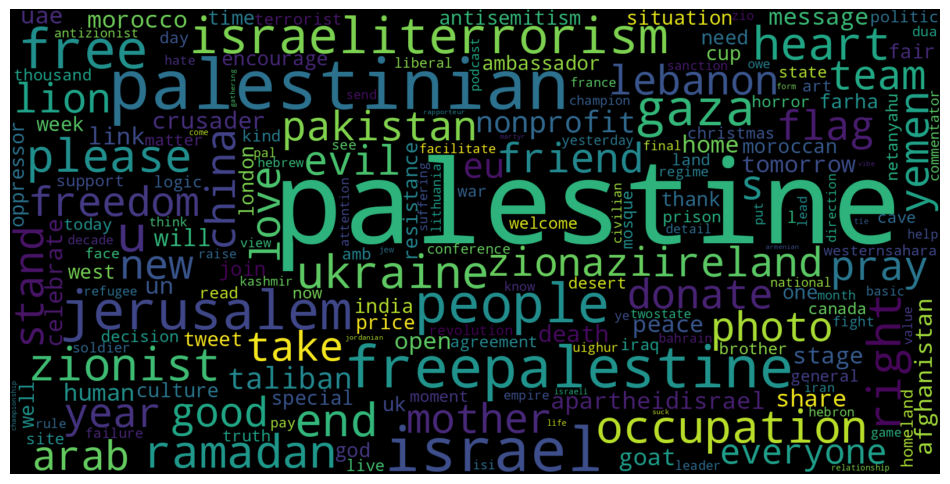

Negative Tweets Palestine


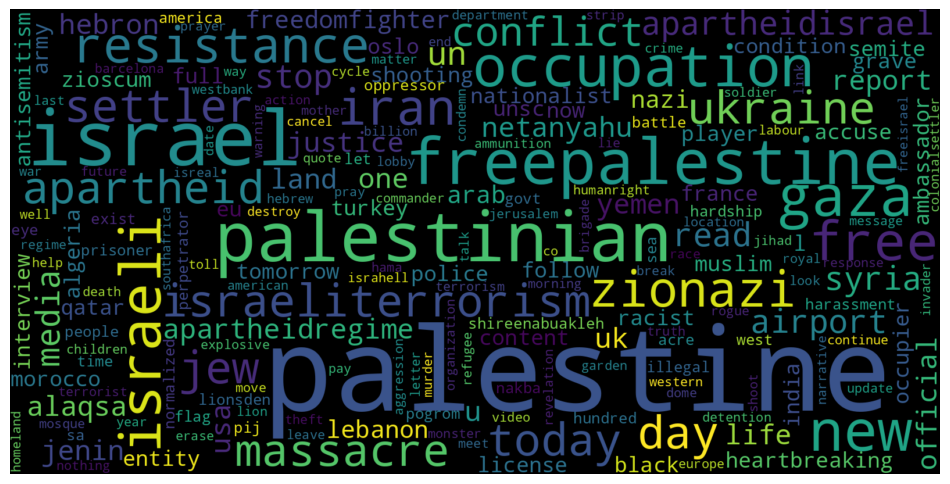

In [4]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import word_tokenize

def generateWordCloud(text):
    words = word_tokenize(text)
    unique_words = set(words) 
    unique_text = ' '.join(unique_words)
    
    wordcloud = WordCloud(width=1600, height=800, max_font_size=200).generate(unique_text)
    plt.figure(figsize=(12,10))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

def getData(file):
    with open(file, 'r', encoding='utf-8') as f:
        text = f.read()
    return text

def main():
    # nltk.download('punkt')
    print("Preprocessed Israel")
    generateWordCloud(getData('preprocessing/preprocessedIsrael.txt'))
    print("Preprocessed Palestine")
    generateWordCloud(getData('preprocessing/preprocessedPalestine.txt'))
    print("Positive Tweets Israel")
    generateWordCloud(getData('analysis/positiveTweetsIsrael.txt'))
    print("Negative Tweets Israel")
    generateWordCloud(getData('analysis/negativeTweetsIsrael.txt'))
    print("Positive Tweets Palestine")
    generateWordCloud(getData('analysis/positiveTweetsPalestine.txt'))
    print("Negative Tweets Palestine")
    generateWordCloud(getData('analysis/negativeTweetsPalestine.txt'))
if __name__ == '__main__':
    main()


Chmury nie przedstawiają raczej zbyt zaskakujących słów - wszystkie w pewnym stopniu wskazują na konflikt pomiędzy tymi państwami, krainy geograficzne, czy słowa generalnie związane z tamtejszą geopolityką i niekiedy na mowę nienawiści wypowiadających się w tweetach.

W analizie czasowej stworzyłem wykres przedstawiający każdy aspekt sentiment score na przestrzeni 300 dni.

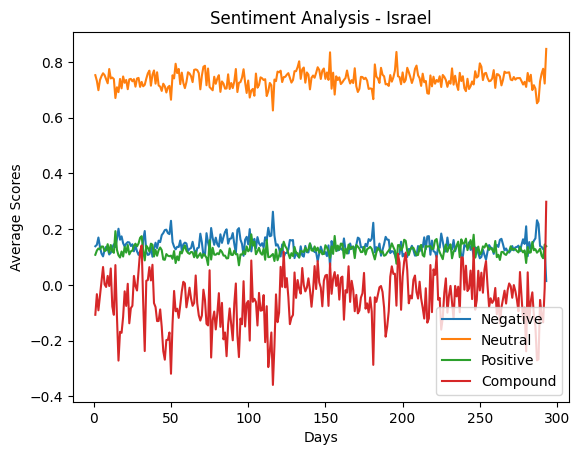

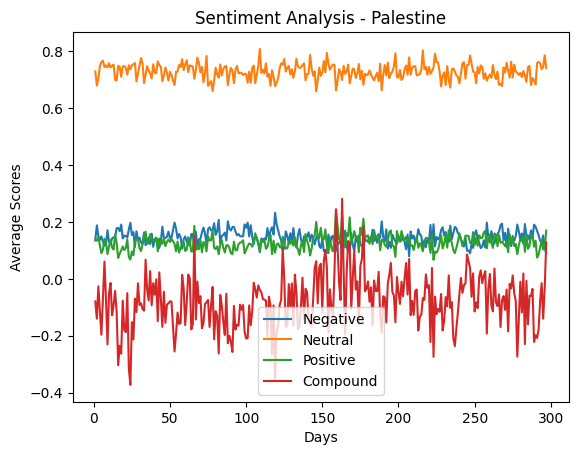

In [6]:
import ast
import matplotlib.pyplot as plt

def parseSentimentScores(line):
    sentiment_start = line.index("{'neg':")
    sentiment_end = line.index("},") + 1
    emotions_start = line.index("{", sentiment_end)
    emotions_end = line.index("};", emotions_start) + 1

    sentiment_scores = ast.literal_eval(line[sentiment_start:sentiment_end])
    emotions = ast.literal_eval(line[emotions_start:emotions_end])

    return sentiment_scores, emotions

def parseData(file):
    data = []
    for line in file:
        line = line.strip()
        if line:
            tweet_end = line.index(",")
            tweet = line[:tweet_end]
            scores, emotions = parseSentimentScores(line)
            data.append((tweet, scores, emotions))
    return data

def calculateAverageScores(data):
    averages = []
    num_opinions = len(data)
    for i in range(0, num_opinions, 100):
        start_index = i
        end_index = min(i + 100, num_opinions)
        opinions = data[start_index:end_index]
        avg_scores = {
            'neg': sum(scores['neg'] for _, scores, _ in opinions) / len(opinions),
            'neu': sum(scores['neu'] for _, scores, _ in opinions) / len(opinions),
            'pos': sum(scores['pos'] for _, scores, _ in opinions) / len(opinions),
            'compound': sum(scores['compound'] for _, scores, _ in opinions) / len(opinions)
        }
        averages.append(avg_scores)
    return averages

def plotAverageScores(averages, title):
    days = range(1, len(averages) + 1)
    neg_scores = [avg_scores['neg'] for avg_scores in averages]
    neu_scores = [avg_scores['neu'] for avg_scores in averages]
    pos_scores = [avg_scores['pos'] for avg_scores in averages]
    compound_scores = [avg_scores['compound'] for avg_scores in averages]

    plt.plot(days, neg_scores, label='Negative')
    plt.plot(days, neu_scores, label='Neutral')
    plt.plot(days, pos_scores, label='Positive')
    plt.plot(days, compound_scores, label='Compound')

    plt.xlabel('Days')
    plt.ylabel('Average Scores')
    plt.title(title)
    plt.legend()
    plt.show()

def main():
    with open("analysis/sentimentScoresIsrael.txt", "r", encoding="utf-8") as file:
        dataIsrael = parseData(file)
        averagesIsrael = calculateAverageScores(dataIsrael)
        plotAverageScores(averagesIsrael, 'Sentiment Analysis - Israel')

    with open("analysis/sentimentScoresPalestine.txt", "r", encoding="utf-8") as file:
        dataPalestine = parseData(file)
        averagesPalestine = calculateAverageScores(dataPalestine)
        plotAverageScores(averagesPalestine, 'Sentiment Analysis - Palestine')

if __name__ == '__main__':
    main()

Na koniec przeprowadziłem również uśrednienie wyników dla obu krajów

In [8]:
import ast
import matplotlib.pyplot as plt

def parseSentimentScores(line):
    sentiment_start = line.index("{'neg':")
    sentiment_end = line.index("},") + 1
    emotions_start = line.index("{", sentiment_end)
    emotions_end = line.index("};", emotions_start) + 1

    sentiment_scores = ast.literal_eval(line[sentiment_start:sentiment_end])
    emotions = ast.literal_eval(line[emotions_start:emotions_end])

    return sentiment_scores, emotions

def parseData(file):
    data = []
    for line in file:
        line = line.strip()
        if line:
            tweet_end = line.index(",")
            tweet = line[:tweet_end]
            scores, emotions = parseSentimentScores(line)
            data.append((tweet, scores, emotions))
    return data

def calculateAverageScores(data):
    avgScores = {
        'neg': 0,
        'neu': 0,
        'pos': 0,
        'compound': 0
    }
    avgEmotions = {
        'Happy': 0,
        'Angry': 0,
        'Surprise': 0,
        'Sad': 0,
        'Fear': 0
    }

    numOpinions = len(data)
    for i in range(numOpinions):
        _, scores, emotions = data[i]
        for key in avgScores:
            avgScores[key] += scores[key] / numOpinions
        for key in avgEmotions:
            avgEmotions[key] += emotions[key] / numOpinions

    return avgScores, avgEmotions

def main():
    with open("analysis/sentimentScoresIsrael.txt", "r", encoding="utf-8") as file:
        dataIsrael = parseData(file)
        avgScoresIsrael, avgEmotionsIsrael = calculateAverageScores(dataIsrael)
        print("Average Sentiment Scores - Israel:")
        print(avgScoresIsrael)
        print("Average Emotions - Israel:")
        print(avgEmotionsIsrael)

    with open("analysis/sentimentScoresPalestine.txt", "r", encoding="utf-8") as file:
        dataPalestine = parseData(file)
        avgScoresPalestine, avgEmotionsPalestine = calculateAverageScores(dataPalestine)
        print("Average Sentiment Scores - Palestine:")
        print(avgScoresPalestine)
        print("Average Emotions - Palestine:")
        print(avgEmotionsPalestine)

if __name__ == '__main__':
    main()

Average Sentiment Scores - Israel:
{'neg': 0.1402739411784841, 'neu': 0.7365070359844709, 'pos': 0.12322111137740926, 'compound': -0.053778066901770116}
Average Emotions - Israel:
{'Happy': 0.11376313897353517, 'Angry': 0.044787550929571006, 'Surprise': 0.1555633923374599, 'Sad': 0.17323758003219256, 'Fear': 0.35754750573496963}
Average Sentiment Scores - Palestine:
{'neg': 0.1448933688433384, 'neu': 0.7278127970872246, 'pos': 0.1272928564204573, 'compound': -0.0800971547045146}
Average Emotions - Palestine:
{'Happy': 0.14064491116879724, 'Angry': 0.04238782321410579, 'Surprise': 0.14005865893537434, 'Sad': 0.1756592387823269, 'Fear': 0.33797255840610163}


Patrząc na te wyniki nie jestem w stanie jednoznacznie określić co z nich wynika. Jeśli chodzi o wykresy to są one bardzo podobne - jedyną znaczącą różnicą jest wzrost pozytywności w tweetach o tagu palestine około 150 dni temu. Wyniki uśrednione pokazują nam, że uśredniona wartość dla Izraela jest wyższa niż dla Palestyny, ale różnica ta jest bardzo mała. Wygląda na to, że większość informacji na tweeterze na oba te tematy jest stosunkowo neutralna. Analizując te tweety po prostu je czytając możemy wywnioskować, że zgadza się to z rzeczywistością - większość ludzi nie ma zbyt mocnego zdania na ten temat, a ci którzy mają, to zazwyczaj są to osoby zainteresowane tematem, które wypowiadają się w sposób racjonalny i nie emocjonalny. Występują także opinie skrajne ale są one w mniejszości i też w większości napisane w sposób stonowany.